<a href="https://colab.research.google.com/github/KarimeAylen/Hola/blob/main/p2/Copia_de_examenParte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32  #Hiperparametros las letras mayusculas: lo puedes definir 

train_dir = "/content/drive/MyDrive/IC/IC-BASE/train"
test_dir = "/content/drive/MyDrive/IC/IC-BASE/test"

train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=40,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")



print("Testing images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SIZE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

Training images:
Found 99 images belonging to 10 classes.
Testing images:
Found 100 images belonging to 10 classes.


In [4]:
train_data

In [5]:
imgs, labels = next(train_data)

In [6]:
labels

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 

In [7]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')     
    plt.tight_layout()
    plt.show()

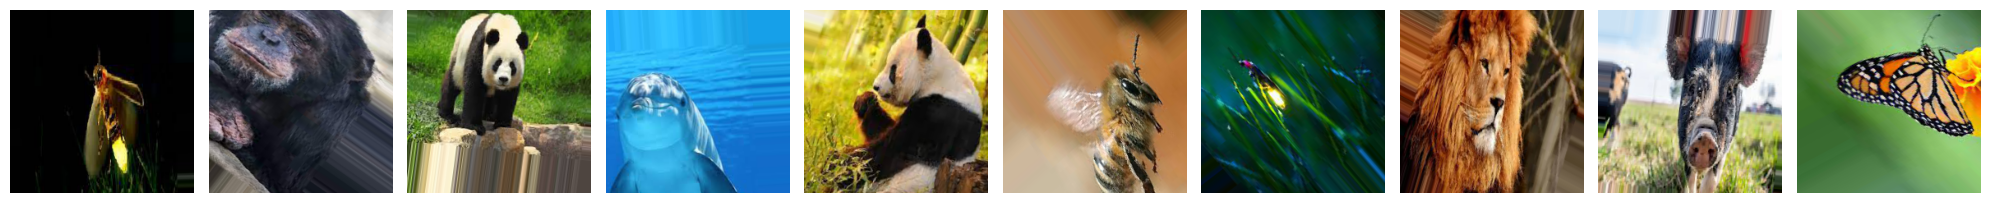

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0.

In [8]:
plotImages(imgs)
print(labels)

In [9]:
model=Sequential()
model.add(Conv2D(20,(10,10),strides=(2,2),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(4,4),strides=(3,3)))
model.add(Conv2D(40,(16,16),strides=(2,2),activation='tanh'))
#model.add(MaxPooling2D(pool_size=(3,3),strides=(3,3)))
#model.add(Conv2D(20,(10,10),strides=(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(1,1),strides=(3,3)))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(90,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 108, 108, 20)      6020      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 35, 35, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 40)        204840    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 40)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 640)               0         
                                                                 
 dense (Dense)               (None, 100)               6

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics='accuracy')

In [12]:
history=model.fit(train_data, validation_data=test_data, epochs=100, batch_size=100)

Epoch 1/100
4/4 [==============================] - 9s 2s/step - loss: 2.3917 - accuracy: 0.0808 - val_loss: 2.3591 - val_accuracy: 0.1000
Epoch 2/100
4/4 [==============================] - 8s 2s/step - loss: 2.3605 - accuracy: 0.1010 - val_loss: 2.3403 - val_accuracy: 0.1000
Epoch 3/100
4/4 [==============================] - 2s 521ms/step - loss: 2.3525 - accuracy: 0.0808 - val_loss: 2.3346 - val_accuracy: 0.1000
Epoch 4/100
4/4 [==============================] - 2s 659ms/step - loss: 2.3432 - accuracy: 0.1010 - val_loss: 2.3249 - val_accuracy: 0.1000
Epoch 5/100
4/4 [==============================] - 2s 576ms/step - loss: 2.3284 - accuracy: 0.1010 - val_loss: 2.3146 - val_accuracy: 0.1200
Epoch 6/100
4/4 [==============================] - 2s 669ms/step - loss: 2.3422 - accuracy: 0.0808 - val_loss: 2.3090 - val_accuracy: 0.1000
Epoch 7/100
4/4 [==============================] - 3s 786ms/step - loss: 2.3177 - accuracy: 0.1010 - val_loss: 2.3048 - val_accuracy: 0.1100
Epoch 8/100
4/4 [==

In [13]:
# Guardar el modelo en formato HDF5 
model.save('./dataset/model_da2.h5')

In [14]:
from tensorflow.keras.preprocessing import image
img_path = './dataset/test/luciernaga/luc17.jpg'
#img_path = './dataset/test/ardilla/ardilla (11).jpg'

In [15]:
img = image.load_img(img_path, target_size=(224, 224))
img

FileNotFoundError: ignored

In [ ]:
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)

In [ ]:
from tensorflow.keras.applications import preprocess_input
X = preprocess_input(X)
preds = modelo.predict(X)

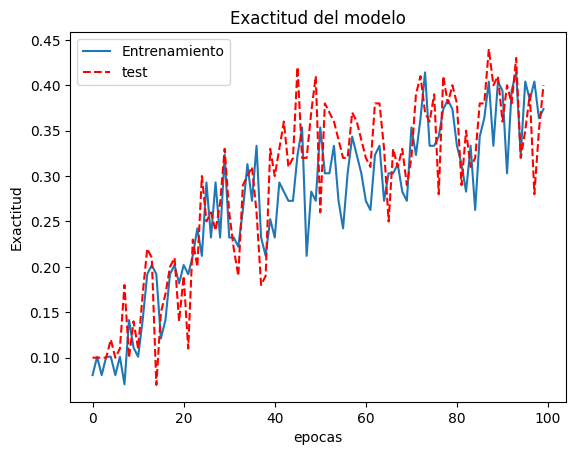

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'r--')
plt.title('Exactitud del modelo')
plt.ylabel('Exactitud')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()

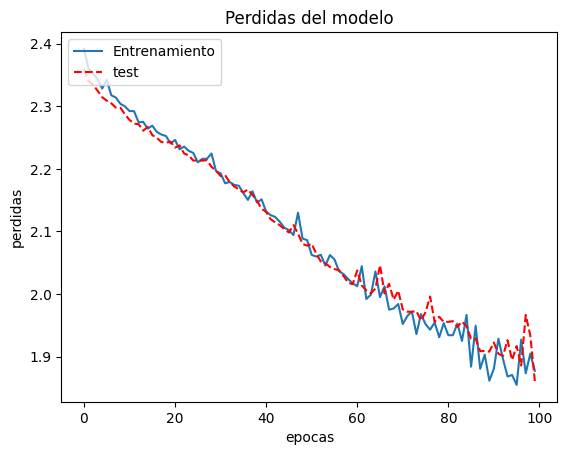

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'r--')
plt.title('Perdidas del modelo')
plt.ylabel('perdidas')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()